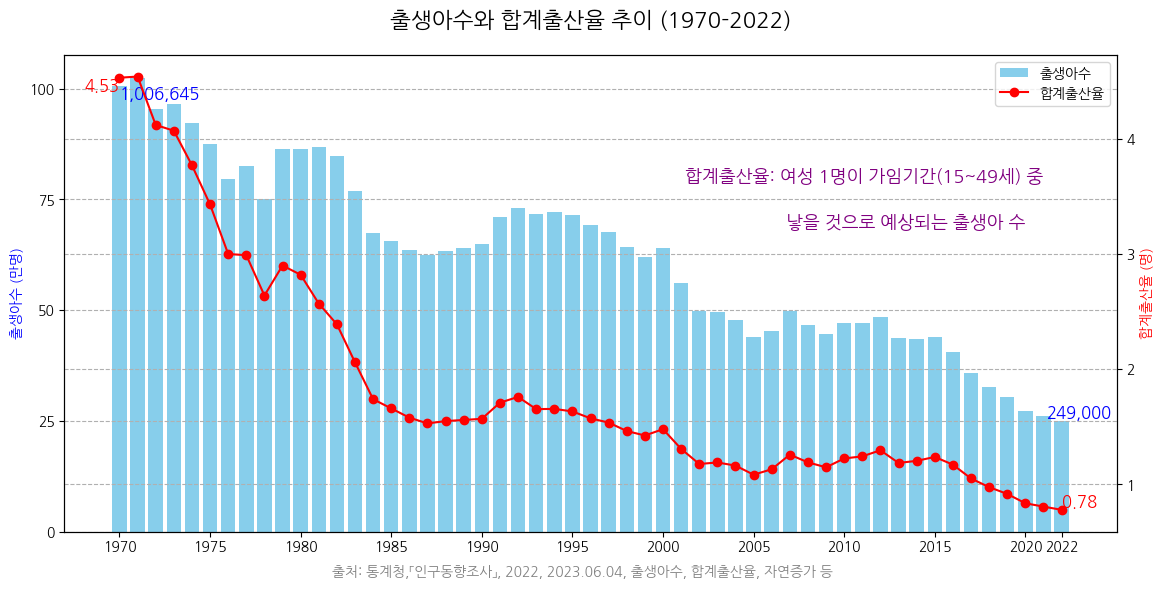

In [10]:
# 출생아수와 합계출산율 그래프 (1970-2022)

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "NanumGothic"

# 데이터 로드
df = pd.read_csv('c:\down\출생아수_합계출산율.csv', encoding="utf-8-sig")

# 출생아수 선택
df_births = df[df['항목'] == '출생아수']
births_values = df_births.iloc[:, 1:].values.flatten()  # 출생아수 컬럼 이후의 값들을 선택

# 합계출산율 선택
df_birth_rate = df[df['항목'] == '합계출산율']
birth_rate_values = df_birth_rate.iloc[:, 1:].values.flatten()  # 합계출산율 컬럼 이후의 값들을 선택

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# 출생아수 막대 그래프
bar_color = 'skyblue'
ax1.bar(range(len(births_values)), births_values, label='출생아수', color=bar_color)
ax1.set_ylabel('출생아수 (만명)', color=bar_color)

# 합계출산율 선 그래프
line_color = 'red'
ax2.plot(range(len(birth_rate_values)), birth_rate_values, marker='o', linestyle='-', color=line_color, label='합계출산율')
ax2.set_ylabel('합계출산율 (명)', color=line_color)


# x축 설정
x_ticks = range(0, len(df.columns[1:]), 5)  # 5년 단위로 눈금 표시
x_labels = df.columns[1:][::5]  # 5년 단위로 라벨 표시
ax1.set_xticks(list(x_ticks) + [len(df.columns[1:]) - 1])  # x축 눈금에 마지막 년도 추가
ax1.set_xticklabels(list(x_labels) + ['2022'])  # x축 라벨에 '2022' 추가

# 축 눈금선 설정
ax1.yaxis.set_major_locator(plt.MultipleLocator(250000))  # 출생아수 왼쪽 눈금선 간격 설정
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x/10000)))  # 출생아수 눈금 포맷 설정
ax1.set_ylabel('출생아수 (만명)', color='blue')

ax2.yaxis.set_major_locator(plt.MultipleLocator(1.0))  # 합계출산율 오른쪽 눈금선 간격 설정

# 축 눈금선 스타일 설정
ax1.grid(axis='y', linestyle='--')
ax2.grid(axis='y', linestyle='--')

# 범례 표시
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

last_idx = len(df.columns) - 1

# 2022년 값 표시
ax1.text(last_idx, births_values[-1], f'{births_values[-1]:,.0f}', fontsize=12, color='blue', ha='center', va='bottom')
ax2.text(last_idx, birth_rate_values[-1], f'{birth_rate_values[-1]:.2f}', fontsize=12, color=line_color, ha='center', va='bottom')

# 1970년 값 표시
ax1.text(0, births_values[0], f'{births_values[0]:,.0f}', fontsize=12, color='blue', ha='left', va='top')
ax2.text(0, birth_rate_values[0], f'{birth_rate_values[0]:.2f}', fontsize=12, color=line_color, ha='right', va='top')

# 그래프 제목
plt.title('출생아수와 합계출산율 추이 (1970-2022)', fontsize=16, pad=20)
plt.tight_layout(pad=2.0)
footer_text = '출처: 통계청,「인구동향조사」, 2022, 2023.06.04, 출생아수, 합계출산율, 자연증가 등'
plt.figtext(0.5, 0.01, footer_text, fontsize=10, color='gray', ha='center')
# 그래프 출력 후 텍스트 추가
plt.text(51, 3.6, '합계출산율: 여성 1명이 가임기간(15~49세) 중', fontsize=13, color="purple", ha='right', va='bottom')
plt.text(50, 3.2, '낳을 것으로 예상되는 출생아 수', fontsize=13, color="purple", ha='right', va='bottom')

# 그래프 출력
plt.show()




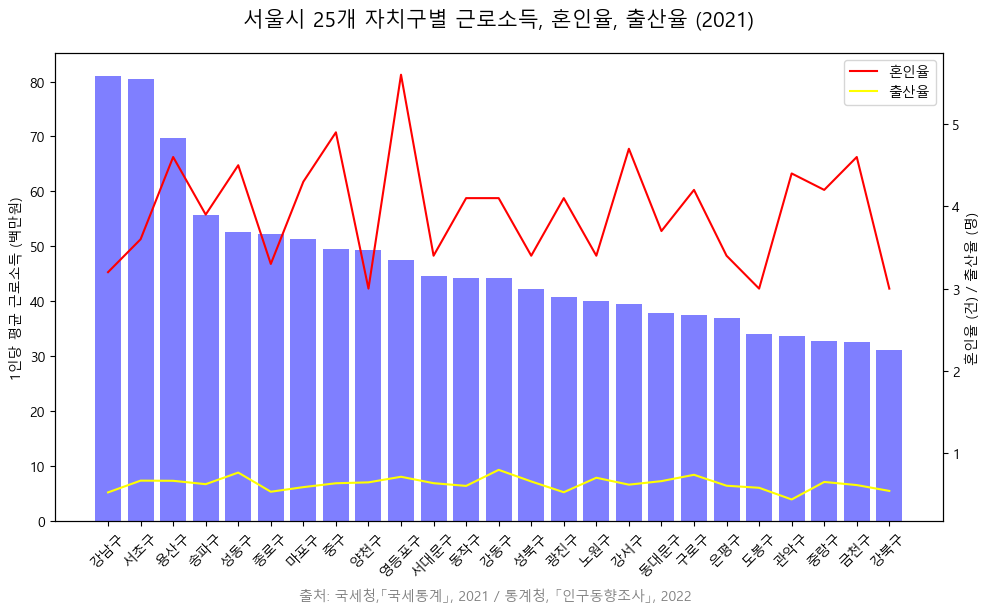

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
income_data = pd.read_csv('구별_2021_1인당_근로소득.csv')
marriage_data = pd.read_csv('구별_조혼인율.csv')
birthrate_data = pd.read_csv('구별_합계출산율.csv')

# 데이터 병합
merged_data = pd.merge(income_data, marriage_data, on='구이름')
merged_data = pd.merge(merged_data, birthrate_data, on='구이름')

# 데이터 정렬
sorted_data = merged_data.sort_values(by='2021_x', ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 소득 막대 그래프
plt.bar(sorted_data['구이름'], sorted_data['2021_x'], color='blue', alpha=0.5)
plt.ylabel('1인당 평균 근로소득 (백만원)')
plt.title('서울시 25개 자치구별 근로소득, 혼인율, 출산율 (2021)', fontsize=15, pad=20)
plt.tight_layout(pad=1.0)
footer_text = '출처: 국세청,「국세통계」, 2021 / 통계청, 「인구동향조사」, 2022'
plt.figtext(0.5, -0.01, footer_text, fontsize=10, color='gray', ha='center')

ax = plt.gca()
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels by 45 degrees

# 축을 오른쪽으로
ax2 = plt.twinx()

# 혼인율과 출산율 선 그래프
plt.plot(sorted_data['구이름'], sorted_data['2021_y'], color='red', label='혼인율')
plt.plot(sorted_data['구이름'], sorted_data['2021'], color='yellow', label='출산율')
plt.ylabel('혼인율 (건) / 출산율 (명)')
plt.legend(loc='upper right')

# 그래프 출력
plt.tight_layout()
plt.show()


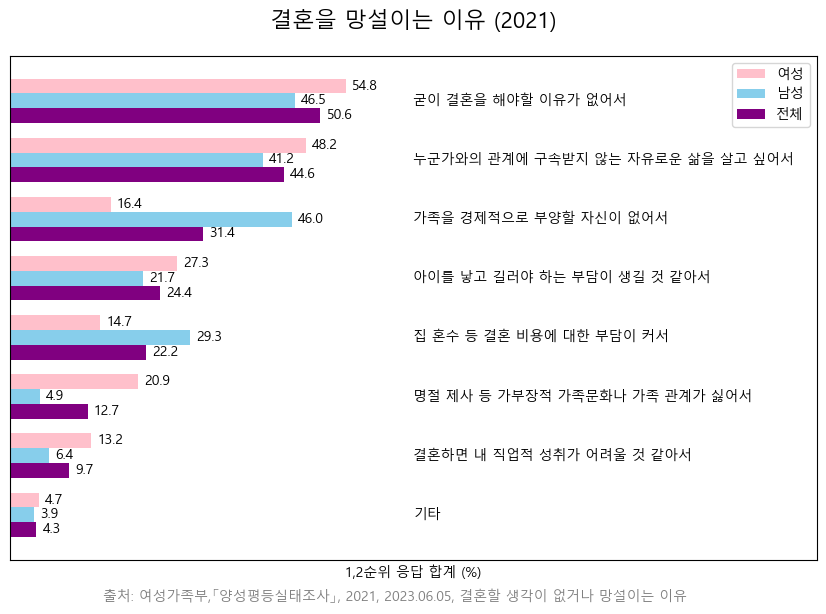

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='malgun Gothic')

# CSV 파일 읽기
data = pd.read_csv('결혼이유.csv', encoding="utf-8-sig")

# 컬럼명과 밸류 추출
reason_columns = data.columns[1:]
values = data.iloc[0, 1:]
male_values = data.iloc[2, 1:]
female_values = data.iloc[1, 1:]

# 전체 바 길이로 정렬
sorted_indices = np.argsort(values)[::]
reason_columns = reason_columns[sorted_indices]
values = values[sorted_indices]
male_values = male_values[sorted_indices]
female_values = female_values[sorted_indices]

# 그래프 설정
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(reason_columns))

# 전체 바 그리기 (보라색)
total_bar = plt.barh(index, values, height=bar_width, color='purple', label='전체')

# 남성 바 그리기 (스카이블루)
male_bars = plt.barh([i + bar_width for i in index], male_values, height=bar_width, color='skyblue', label='남성')

# 여성 바 그리기 (분홍색)
female_bars = plt.barh([i + bar_width * 2 for i in index], female_values, height=bar_width, color='pink', label='여성')

# 바 끝에 이유와 밸류 표시
for i, bar in enumerate(total_bar):
    if np.isfinite(bar.get_width()):  # Check if the width is a finite value
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{values[i]}', ha='left', va='center')

for i, bar in enumerate(male_bars):
    if np.isfinite(bar.get_width()):  # Check if the width is a finite value
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{male_values[i]}', ha='left', va='center')

for i, bar in enumerate(female_bars):
    if np.isfinite(bar.get_width()):  # Check if the width is a finite value
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{female_values[i]}', ha='left', va='center')

# 이유 텍스트 바 끝 밸류에서 오른쪽으로 조금 떨어진 곳으로 옮기기
for i, reason in enumerate(reason_columns):
    x_position = max(max(values), max(male_values), max(female_values)) * 1.2 # Set x-coordinate position
    y_position = i + bar_width * 1  # Set y-coordinate position to align with the center of the three bars
    plt.text(x_position, y_position, reason, ha='left', va='center')

# 그래프 제목과 축 레이블 설정

plt.title('결혼을 망설이는 이유 (2021)', fontsize=16, pad=20)
plt.xlabel('1,2순위 응답 합계 (%)')
plt.tight_layout(pad=2.0)
footer_text = '출처: 여성가족부,「양성평등실태조사」, 2021, 2023.06.05, 결혼할 생각이 없거나 망설이는 이유'
plt.figtext(0.4, -0.01, footer_text, fontsize=10, color='gray', ha='center')

# y축 설정
plt.yticks([])

# 범례 표시
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])

# 그래프 영역 조정
plt.xlim(right=max(max(values), max(male_values), max(female_values)) * 2.4)  # Adjust x-axis limit
plt.xticks([])

# 그래프 출력
plt.tight_layout()
plt.show()


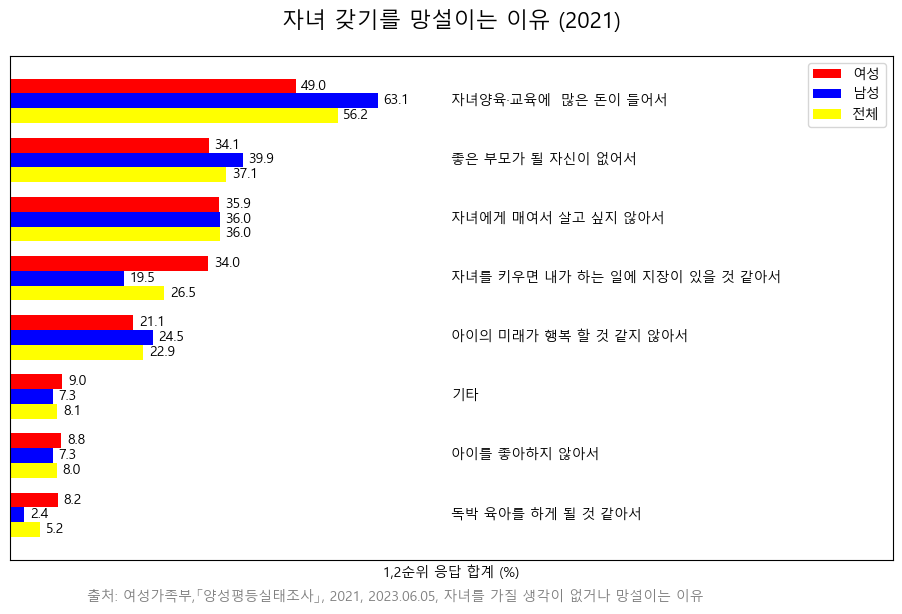

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='malgun Gothic')

# CSV 파일 읽기
data = pd.read_csv('자녀이유.csv', encoding="utf-8-sig")

# 컬럼명과 밸류 추출
reason_columns = data.columns[1:]
values = data.iloc[0, 1:]
male_values = data.iloc[2, 1:]
female_values = data.iloc[1, 1:]

# 전체 바 길이로 정렬
sorted_indices = np.argsort(values)[::]
reason_columns = reason_columns[sorted_indices]
values = values[sorted_indices]
male_values = male_values[sorted_indices]
female_values = female_values[sorted_indices]

# 그래프 설정
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(reason_columns))

# 전체 바 그리기 (보라색)
total_bar = plt.barh(index, values, height=bar_width, color='yellow', label='전체')

# 남성 바 그리기 (스카이블루)
male_bars = plt.barh([i + bar_width for i in index], male_values, height=bar_width, color='blue', label='남성')

# 여성 바 그리기 (분홍색)
female_bars = plt.barh([i + bar_width * 2 for i in index], female_values, height=bar_width, color='red', label='여성')

# 바 끝에 이유와 밸류 표시
for i, bar in enumerate(total_bar):
    if np.isfinite(bar.get_width()):  # Check if the width is a finite value
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{values[i]}', ha='left', va='center')

for i, bar in enumerate(male_bars):
    if np.isfinite(bar.get_width()):  # Check if the width is a finite value
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{male_values[i]}', ha='left', va='center')

for i, bar in enumerate(female_bars):
    if np.isfinite(bar.get_width()):  # Check if the width is a finite value
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{female_values[i]}', ha='left', va='center')

# 이유 텍스트 바 끝 밸류에서 오른쪽으로 조금 떨어진 곳으로 옮기기
for i, reason in enumerate(reason_columns):
    x_position = max(max(values), max(male_values), max(female_values)) * 1.2 # Set x-coordinate position
    y_position = i + bar_width * 1  # Set y-coordinate position to align with the center of the three bars
    plt.text(x_position, y_position, reason, ha='left', va='center')

# 그래프 제목과 축 레이블 설정

plt.title('자녀 갖기를 망설이는 이유 (2021)', fontsize=16, pad=20)
plt.xlabel('1,2순위 응답 합계 (%)')
plt.tight_layout(pad=2.0)
footer_text = '출처: 여성가족부,「양성평등실태조사」, 2021, 2023.06.05, 자녀를 가질 생각이 없거나 망설이는 이유'
plt.figtext(0.4, -0.01, footer_text, fontsize=10, color='gray', ha='center')

# y축 설정
plt.yticks([])

# 범례 표시
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])

# 그래프 영역 조정
plt.xlim(right=max(max(values), max(male_values), max(female_values)) * 2.4)  # Adjust x-axis limit
plt.xticks([])

# 그래프 출력
plt.tight_layout()
plt.show()
